In [36]:
import tensorflow as tf
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import numpy as np


training_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

In [3]:
batch_size = 10

train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

print(len(train_dataloader))
print(len(test_dataloader))

6000
1000


In [25]:
class ConvolutionNeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = x.view(-1, 64 * 7 * 7)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = ConvolutionNeuralNetwork()

print(model)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.001)

ConvolutionNeuralNetwork(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=3136, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


In [23]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()

    for batch, (X, y) in enumerate(dataloader):
        optimizer.zero_grad()
        pred = model(X)

        loss = loss_fn(pred, y)
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            current = batch * len(X)
            print(f"Loss: {loss.item():>7f}  [{current:>5d}/{size:>5d}]")

def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)

            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    return correct

Loss: 2.308354  [    0/60000]
Loss: 0.807996  [ 1000/60000]
Loss: 0.177700  [ 2000/60000]
Loss: 0.210719  [ 3000/60000]
Loss: 0.195889  [ 4000/60000]
Loss: 0.039104  [ 5000/60000]
Loss: 0.056496  [ 6000/60000]
Loss: 0.329672  [ 7000/60000]
Loss: 0.044360  [ 8000/60000]
Loss: 0.594386  [ 9000/60000]
Loss: 0.003485  [10000/60000]
Loss: 0.037296  [11000/60000]
Loss: 0.300529  [12000/60000]
Loss: 0.135551  [13000/60000]
Loss: 0.340843  [14000/60000]
Loss: 0.003982  [15000/60000]
Loss: 0.003424  [16000/60000]
Loss: 0.046287  [17000/60000]
Loss: 0.226127  [18000/60000]
Loss: 0.293906  [19000/60000]
Loss: 0.007293  [20000/60000]
Loss: 0.007954  [21000/60000]
Loss: 0.008096  [22000/60000]
Loss: 0.119449  [23000/60000]
Loss: 0.040619  [24000/60000]
Loss: 0.005869  [25000/60000]
Loss: 0.002631  [26000/60000]
Loss: 0.003794  [27000/60000]
Loss: 0.002307  [28000/60000]
Loss: 0.002969  [29000/60000]
Loss: 0.004000  [30000/60000]
Loss: 0.003896  [31000/60000]
Loss: 0.011945  [32000/60000]
Loss: 0.03

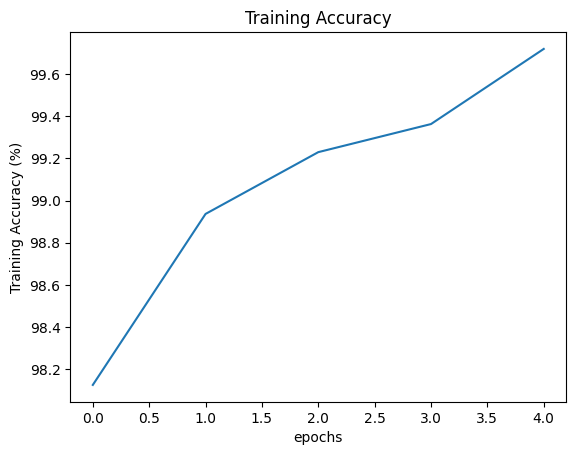

Done!


In [26]:
epochs = 5
train_acc = []

for t in range(epochs):
    train(train_dataloader, model, loss_fn, optimizer)
    acc_train = test(train_dataloader, model, loss_fn)
    train_acc.append(acc_train * 100)

plt.plot(train_acc)
plt.title('Training Accuracy')
plt.xlabel('epochs')
plt.ylabel('Training Accuracy (%)')
plt.show()

print("Done!")

In [39]:
classes = {
    0: "0",
    1: "1",
    2: "2",
    3: "3",
    4: "4",
    5: "5",
    6: "6",
    7: "7",
    8: "8",
    9: "9",
}

model.eval()
x, y = test_data[0][0], test_data[0][1]

with torch.no_grad():
    pred = model(x.unsqueeze(0))
    predicted, actual = classes[pred.argmax().item()], classes[y]
    print(f'Predicted: "{predicted}", Actual: "{actual}"')


Predicted: "7", Actual: "7"
